In [9]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import numpy as np
from PIL import Image, ImageOps

## Get the number of translations for each Harry Potter book

In [10]:
html = req.get("https://en.wikipedia.org/wiki/Harry_Potter_in_translation")
soup = BeautifulSoup(html.text, 'html.parser')

In [11]:
all_els = soup.find('tbody').findAll('tr')[1:] # remove the header line
nb_translations = np.zeros((7,1))

for line in all_els:
    if(len(line.findAll('ol'))==0):
        pass
    else:
        nb = len(line.findAll('ol')[0].findAll('li'))

        temp = np.zeros((7,1))
        temp[0:nb]=1
        nb_translations+=temp

In [12]:
nb_translations

array([[90.],
       [72.],
       [47.],
       [39.],
       [32.],
       [30.],
       [28.]])

We can see taht the first book is the one that is the most translated in total. The second alredy lost 20 translations, the third one has only half the translations of
the thirst and the rest of the book aonly get one third of the number of tranlations of the first one. These values will be manually added to the book Harry Potter Collection's JSON

## Download all the characters images

In [13]:
import shutil
import requests
output_folder = "../data/images/characters/"
characters = pd.read_json("../data/cleaned/selected_chars.json").loc[:,["image_name", "link_image"]]
characters.head()

,image_name,link_image
0,aragog,http://img4.wikia.nocookie.net/__cb20100611145...
1,ludovic_bagman,http://img1.wikia.nocookie.net/__cb20111028215...
2,bane,http://img3.wikia.nocookie.net/__cb20100712171...
3,cuthbert_binns,http://img1.wikia.nocookie.net/__cb20130907183...
4,regulus_black,http://img2.wikia.nocookie.net/__cb20111004231...


In [14]:
# Source : https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests
def download_image_and_save(name, link_image, custom_link):
    if(name in custom_link):
        link_image = custom_link[name]
    
    response = requests.get(link_image, stream=True)
    with open(output_folder+name+'.png', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response
    
    im = Image.open(output_folder+name+'.png')
    old_size = im.size
    desired_size = im.size[0]  # old_size[0] is in (width, height) format
    
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)
    
    im_crop = im.crop((0, 0, desired_size, desired_size))

    im_crop.save(output_folder+name+'.png')

In [15]:
dico = {
    "aberforth_dumbledore": "https://static.wikia.nocookie.net/harrypotter/images/1/1a/Aberforth.jpg/revision/latest/top-crop/width/360/height/450?cb=20141115085234&path-prefix=fr",
    "alicia_spinnet":"https://static.wikia.nocookie.net/harrypotter/images/7/7a/Alicia_Spinnet.png/revision/latest?cb=20100121181636&path-prefix=fr",
    "amelia_bones": "https://static.wikia.nocookie.net/harrypotter/images/9/9c/Amelia_Bones_2.jpg/revision/latest?cb=20110826230102&path-prefix=fr",
    "amos_diggory":"https://static.wikia.nocookie.net/harrypotter/images/f/f0/PromoHP4_AmosDiggory.jpg/revision/latest?cb=20090920082156&path-prefix=fr",
    "amycus_carrow":"https://static.wikia.nocookie.net/harrypotter/images/9/97/Amycus_Carrow_PM.png/revision/latest?cb=20170203044409",
    "andromeda_tonks":"https://static.wikia.nocookie.net/harrypotter/images/c/c2/Andromeda_Tonks_%28Jessica_Roux%29.png/revision/latest?cb=20180609224846&path-prefix=de",
    "angelina_johnson": "https://static.wikia.nocookie.net/harrypotter/images/6/6c/PromoHP4_AngelinaJohnson.jpg/revision/latest/top-crop/width/360/height/450?cb=20090919112303&path-prefix=fr",
    "antonin_dolohov":"https://static.wikia.nocookie.net/harrypotter/images/7/74/Dolohov-0.jpg/revision/latest?cb=20181228122546",
    "aragog": "https://static.wikia.nocookie.net/harrypotter/images/d/d2/Ara.jpg/revision/latest?cb=20130615192317&path-prefix=de",
    "arthur_weasley": "https://static.wikia.nocookie.net/harrypotter/images/c/c1/PromoHP7_Arthur_Weasley.jpg/revision/latest?cb=20110901200337&path-prefix=fr",
    "augustus_rookwood":"https://static.wikia.nocookie.net/harrypotter/images/3/3e/Rookwood_Pottermore.png/revision/latest?cb=20171031194639&path-prefix=fr",
    "bane":"https://static.wikia.nocookie.net/harrypotter/images/2/2f/Bane.jpg/revision/latest/top-crop/width/360/height/450?cb=20140730143107&path-prefix=fr",
    "bartemius_crouch_junior":"https://static.wikia.nocookie.net/warner-bros-entertainment/images/f/fa/BartyCouchjr.jpg/revision/latest/top-crop/width/360/height/450?cb=20171104211944",
    "bartemius_crouch_senior":"https://static.wikia.nocookie.net/harrypotter/images/3/37/Barty_Crouch_Senior_GOFF_promo.jpg/revision/latest?cb=20100123214858",
    "bathilda_bagshot":"https://static.wikia.nocookie.net/harrypotter/images/0/0d/Bathilda_Bagshot_profile.jpg/revision/latest?cb=20161119223158",
    "bill_weasley":"https://static.wikia.nocookie.net/harrypotter/images/8/86/Bill_Promo.jpg/revision/latest/top-crop/width/360/height/450?cb=20141115085723&path-prefix=fr",
    "blaise_zabini":"https://static.wikia.nocookie.net/harrypotter/images/5/59/Blaise_Zabini.png/revision/latest?cb=20091110145549&path-prefix=fr",
    "bloody_baron":"https://static.wikia.nocookie.net/harrypotter/images/5/55/Bloody_Baron.jpg/revision/latest/top-crop/width/360/height/360?cb=20100408172210",
    "charity_burbage":"https://static.wikia.nocookie.net/harrypotter/images/a/a4/Carolyn_Pickles.png/revision/latest?cb=20210623183233",
    "cho_chang":"https://static.wikia.nocookie.net/harrypotter/images/d/d3/PromoHP5_Cho_Chang.jpg/revision/latest?cb=20090322135602&path-prefix=fr",
    "cormac_mclaggen":"https://static.wikia.nocookie.net/harrypotter/images/8/8d/Cormac_McLaggen.jpg/revision/latest/top-crop/width/360/height/450?cb=20120608163726&path-prefix=fr",
    "cornelius_fudge":"https://static.wikia.nocookie.net/harrypotter/images/d/d7/Cornelius_Fudge.jpg/revision/latest/top-crop/width/360/height/450?cb=20110826095744&path-prefix=fr",
    "dudley_dursley":"https://static.wikia.nocookie.net/harrypotter/images/4/48/Dudley_Dursley.jpg/revision/latest?cb=20120131182025&path-prefix=de",
    "elphias_doge":"https://static.wikia.nocookie.net/harrypotter/images/4/4e/Elphias_Doge_2.jpg/revision/latest/top-crop/width/360/height/450?cb=20110826100148&path-prefix=fr",
    "fenrir_greyback":"https://static.wikia.nocookie.net/harrypotter/images/5/5d/PromoHP6_Fenrir_Greyback.jpg/revision/latest/top-crop/width/360/height/450?cb=20090821070417&path-prefix=fr",
    "fleur_delacour":"https://static.wikia.nocookie.net/harrypotter/images/5/53/PromoHP7_Fleur_Delacour.jpg/revision/latest/top-crop/width/360/height/450?cb=20110901131945&path-prefix=fr",
    "fred_weasley":"https://static.wikia.nocookie.net/harrypotter/images/8/8b/PromoHP7_Fred_Weasley.jpg/revision/latest?cb=20110901202603&path-prefix=fr",
    "gabrielle_delacour":"https://static.wikia.nocookie.net/harrypotter/images/2/2d/PromoHP4_Gabrielle_Delacour.jpg/revision/latest/top-crop/width/360/height/450?cb=20110829082905&path-prefix=fr",
    "garrick_ollivander":"https://static.wikia.nocookie.net/harrypotter/images/9/9a/GarrickOllivander.jpg/revision/latest?cb=20141115085020&path-prefix=fr",
    "george_weasley":"https://static.wikia.nocookie.net/harrypotter/images/8/8f/PromoHP7_George_Weasley.jpg/revision/latest?cb=20110901202407&path-prefix=fr",
    "gilderoy_lockhart":"https://static.wikia.nocookie.net/harrypotter/images/c/c4/PromoHP2_Gilderoy_Lockhart_4.jpg/revision/latest/top-crop/width/360/height/450?cb=20120410202927&path-prefix=fr",
    "godric_gryffindor":"https://static.wikia.nocookie.net/harrypotter/images/f/f7/Gryffondor_promo.jpg/revision/latest?cb=20141116063526&path-prefix=fr",
    "grawp":"https://static.wikia.nocookie.net/harrypotter/images/e/e6/Grawp.png/revision/latest?cb=20140809230305&path-prefix=de",
    "gregory_goyle":"https://static.wikia.nocookie.net/harrypotter/images/9/9f/PromoHP3_Gregory_Goyle.jpg/revision/latest/top-crop/width/360/height/450?cb=20091021125109&path-prefix=fr",
    "helga_hufflepuff":"https://static.wikia.nocookie.net/harrypotter/images/2/24/Helga_Poufsouffle_promo.jpg/revision/latest?cb=20141116063756&path-prefix=fr",
    "hermione_granger":"https://static.wikia.nocookie.net/harrypotter/images/f/f8/PromoHP7_Hermione_Granger.jpg/revision/latest?cb=20110901130218&path-prefix=fr",
    "igor_karkaroff":"https://static.wikia.nocookie.net/harrypotter/images/3/3c/PromoHP4_IgorKarkaroff.jpg/revision/latest?cb=20090918153048&path-prefix=fr",
    "james_potter":"https://static.wikia.nocookie.net/harrypotter/images/1/10/James_Potter_I_Deathly_Hallows.jpg/revision/latest?cb=20180601015416",
    "katie_bell":"https://static.wikia.nocookie.net/harrypotter/images/b/b0/PromoHP7_Katie_Bell.jpg/revision/latest/top-crop/width/360/height/450?cb=20110901130733&path-prefix=fr",
    "myrtle_warren":"https://static.wikia.nocookie.net/harrypotter/images/b/b8/Myrtle_Warren_profile.png/revision/latest?cb=20170113020338",
    "lord_voldemort":"https://static.wikia.nocookie.net/harrypotter/images/a/aa/Voldemort_Headshot_DHP1.png/revision/latest?cb=20161203031453",
    "ludovic_bagman":"https://static.wikia.nocookie.net/harrypotter/images/b/b2/Ludo_Verpey.png/revision/latest?cb=20171123130115&path-prefix=fr",
    "luna_lovegood":"https://static.wikia.nocookie.net/harrypotter/images/6/64/Luna_Infobox.jpg/revision/latest?cb=20130625201357&path-prefix=de",
    "marvolo_gaunt":"https://static.wikia.nocookie.net/harrypotter/images/2/2d/MarvoloGaunt.jpeg/revision/latest?cb=20180101230127",
    "merope_gaunt":"https://static.wikia.nocookie.net/harrypotter/images/f/ff/MeropeGaunt.jpeg/revision/latest?cb=20211222114521",
    "mary_cattermole":"https://static.wikia.nocookie.net/harrypotter/images/c/c2/Mary_Cattermole_2.jpg/revision/latest/top-crop/width/360/height/450?cb=20150222122547&path-prefix=fr",
    "moaning_myrtle":"https://static.wikia.nocookie.net/harrypotter/images/b/b8/Myrtle_Warren_profile.png/revision/latest?cb=20170113020338",
    "molly_weasley":"https://static.wikia.nocookie.net/harrypotter/images/b/bf/PromoHP7_Molly_Weasley.jpg/revision/latest?cb=20110901204925&path-prefix=fr",
    "mykew_gregorovitch":"https://static.wikia.nocookie.net/harrypotter/images/e/ee/Mykew_Gregorovitch.jpg/revision/latest?cb=20161119161206",
    "morfin_gaunt":"https://static.wikia.nocookie.net/harrypotter/images/5/55/Morfin_Gaunt_2.jpg/revision/latest?cb=20180101130436&path-prefix=fr",
    "nicholas_de_mimsy-porpington":"https://static.wikia.nocookie.net/harrypotter/images/6/6d/Nicholas_de_Mimsy-Porpington.png/revision/latest?cb=20200515191831",
    "norberta":"https://static.wikia.nocookie.net/harrypotter/images/c/c1/Norberta_Norwegian_Ridgeback.jpg/revision/latest?cb=20161122220257",
    "nymphadora_tonks":"https://static.wikia.nocookie.net/harrypotter/images/8/81/Nymphadora_Tonks_DH2.jpg/revision/latest/top-crop/width/360/height/450?cb=20150222123217&path-prefix=fr",
    "pansy_parkinson":"https://static.wikia.nocookie.net/harrypotter/images/e/e8/PromoHP7_Pansy_Parkinson.jpg/revision/latest/top-crop/width/360/height/450?cb=20110901153320&path-prefix=fr",
    "penelope_clearwater":"https://static.wikia.nocookie.net/harrypotterfanon/images/5/54/Evellyn.PNG/revision/latest?cb=20130927012659",
    "pomona_sprout":"https://static.wikia.nocookie.net/harrypotter/images/7/71/PSprout.png/revision/latest?cb=20110109155242",
    "quirinus_quirrell":"https://static.wikia.nocookie.net/harrypotter/images/5/58/PromoHP1_Quirinus_Quirrell_2.jpg/revision/latest?cb=20120403071231&path-prefix=fr",
    "rabastan_lestrange":"https://static.wikia.nocookie.net/harrypotterfanon/images/9/9d/Rodolphus-lestrange.jpg/revision/latest/top-crop/width/360/height/450?cb=20190919005630",
    "reginald_cattermole":"https://static.wikia.nocookie.net/harrypotter/images/9/94/Reginald_Cattermole.jpg/revision/latest?cb=20150222122435&path-prefix=fr",
    "romilda_vane":"https://static.wikia.nocookie.net/harrypotter/images/7/7f/Romilda_Vane.jpg/revision/latest/top-crop/width/360/height/450?cb=20160307123959&path-prefix=fr",
    "ronald_weasley":"https://static.wikia.nocookie.net/harrypotter/images/7/74/PromoHP7_Ron_Weasley.jpg/revision/latest?cb=20150916123346&path-prefix=fr",
    "rubeus_hagrid":"https://static.wikia.nocookie.net/harrypotter/images/1/1a/PromoHP3_Rubeus_Hagrid.jpg/revision/latest/top-crop/width/360/height/450?cb=20090103221029&path-prefix=fr",
    "rufus_scrimgeour":"https://static.wikia.nocookie.net/harrypotter/images/c/ca/PromoHP7_Rufus_Scrimgeour.jpg/revision/latest?cb=20100902065406&path-prefix=fr",
    "salazar_slytherin":"https://static.wikia.nocookie.net/harrypotter/images/f/fc/Salazar_Serpentard_Promo.jpg/revision/latest?cb=20141116064309&path-prefix=fr",
    "septima_vector":"https://static.wikia.nocookie.net/harrypotter/images/4/49/Septima_Vector.jpg/revision/latest/top-crop/width/360/height/450?cb=20110620110019&path-prefix=fr",
    "sirius_black":"https://static.wikia.nocookie.net/harrypotter/images/9/93/PromoHP5_Sirius_Black.jpg/revision/latest/top-crop/width/360/height/450?cb=20090601145207&path-prefix=fr",
    "sybill_trelawney":"https://static.wikia.nocookie.net/harrypotter/images/e/ee/PromoHP3_Sibylle_Trelawney.jpg/revision/latest?cb=20110901194133&path-prefix=fr",
    "ted_tonks":"https://static.wikia.nocookie.net/harrypotter/images/d/de/Ted_Tonks.png/revision/latest?cb=20130901194234&path-prefix=fr",
    "teddy_lupin":"https://static.wikia.nocookie.net/harrypotter/images/6/62/Teddy_Lupin.png/revision/latest?cb=20160801025828",
    "theodore_nott":"https://static.wikia.nocookie.net/harry-potter-fanons/images/f/f7/DA95DE64-411B-4017-ACC4-BB1D9D8BC0D4.jpg/revision/latest/scale-to-width-down/490?cb=20200717122910",
    "tiberius_ogden":"https://static.wikia.nocookie.net/harryalbuspotter/images/d/de/TiberiusNott.PNG/revision/latest?cb=20120130200228",
    "tom_riddle_voldemort":"https://static.wikia.nocookie.net/harrypotter/images/d/d1/Voldemort_Info.jpg/revision/latest?cb=20130703134443&path-prefix=de"
}

In [16]:
characters.apply(lambda x: download_image_and_save(x['image_name'], x['link_image'],dico),axis=1)
None

Unfortunately, not all the images are available anymore. Hence, we still have to do a manual list of the character we would like to have in our visualisation. We will try to complete the dataset in the best possible way. We will replace characters that do not appear in screen with some drawing made by fan if it is needed. 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
times = np.array([237772.74, 122221.09 ,72950.37])/1000
nb_workers = [1,2,4]
std_dev = np.array([9220.56 ,829.48,4685.52])/1000

line = np.linalg.lstsq(np.array([[nb_workers[0],1],[nb_workers[1],1],[nb_workers[2],1]]), np.array(times))[0]

/var/folders/vf/btrykr5n65v_k_lwb61317k80000gn/T/ipykernel_1719/4074567623.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  line = np.linalg.lstsq(np.array([[nb_workers[0],1],[nb_workers[1],1],[nb_workers[2],1]]), np.array(times))[0]


/var/folders/vf/btrykr5n65v_k_lwb61317k80000gn/T/ipykernel_1719/1457308046.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


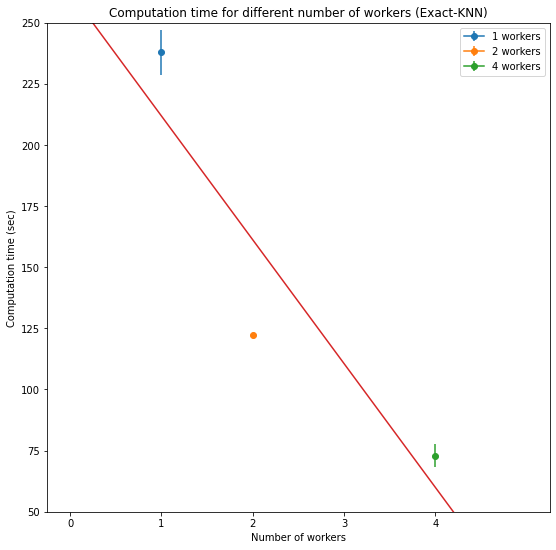

In [23]:
fig, ax = plt.subplots(1, figsize=(9,9))

for t, w, std in zip(times, nb_workers, std_dev):
    ax.errorbar(w, t, std, marker='o', label=f"{w} workers")

ax.set_xticks(np.arange(5))
values = np.linspace(0,5,20)
ax.plot(values, values*line[0]+line[1])
ax.legend(loc=1)
ax.set_ylim([50,250])
ax.set_title("Computation time for different number of workers (Exact-KNN)")
ax.set_xlabel("Number of workers")
ax.set_ylabel("Computation time (sec)")
fig.show()
fig.savefig("ek2.png")